# Goodness of Fit Tutorial
We will learn how to use goodness of fit methods using the the [House prices dataset (Kaggle)](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) <br> 



### 0. Imports

In [1]:
#data processing
import pandas as pd
import numpy as np
import scipy as sp

#statistics
from scipy import stats
import statsmodels.api as sm


#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning library
import sklearn

import warnings
warnings.filterwarnings("ignore")


### Loading the CSV dataset

In [2]:
dataset_path = "../datasets/houseprices/train.csv"

In [3]:
dtf = pd.read_csv(dataset_path,index_col='Id')

In [4]:
numeric_columns = dtf.dtypes[(dtf.dtypes=="float64") | (dtf.dtypes=="int64")].index.tolist()

In [69]:
categorical_columns = [c for c in dtf.columns if c not in numeric_columns]

### Value Histograms for Categorical Variables (via Pandas and Matplotlib)

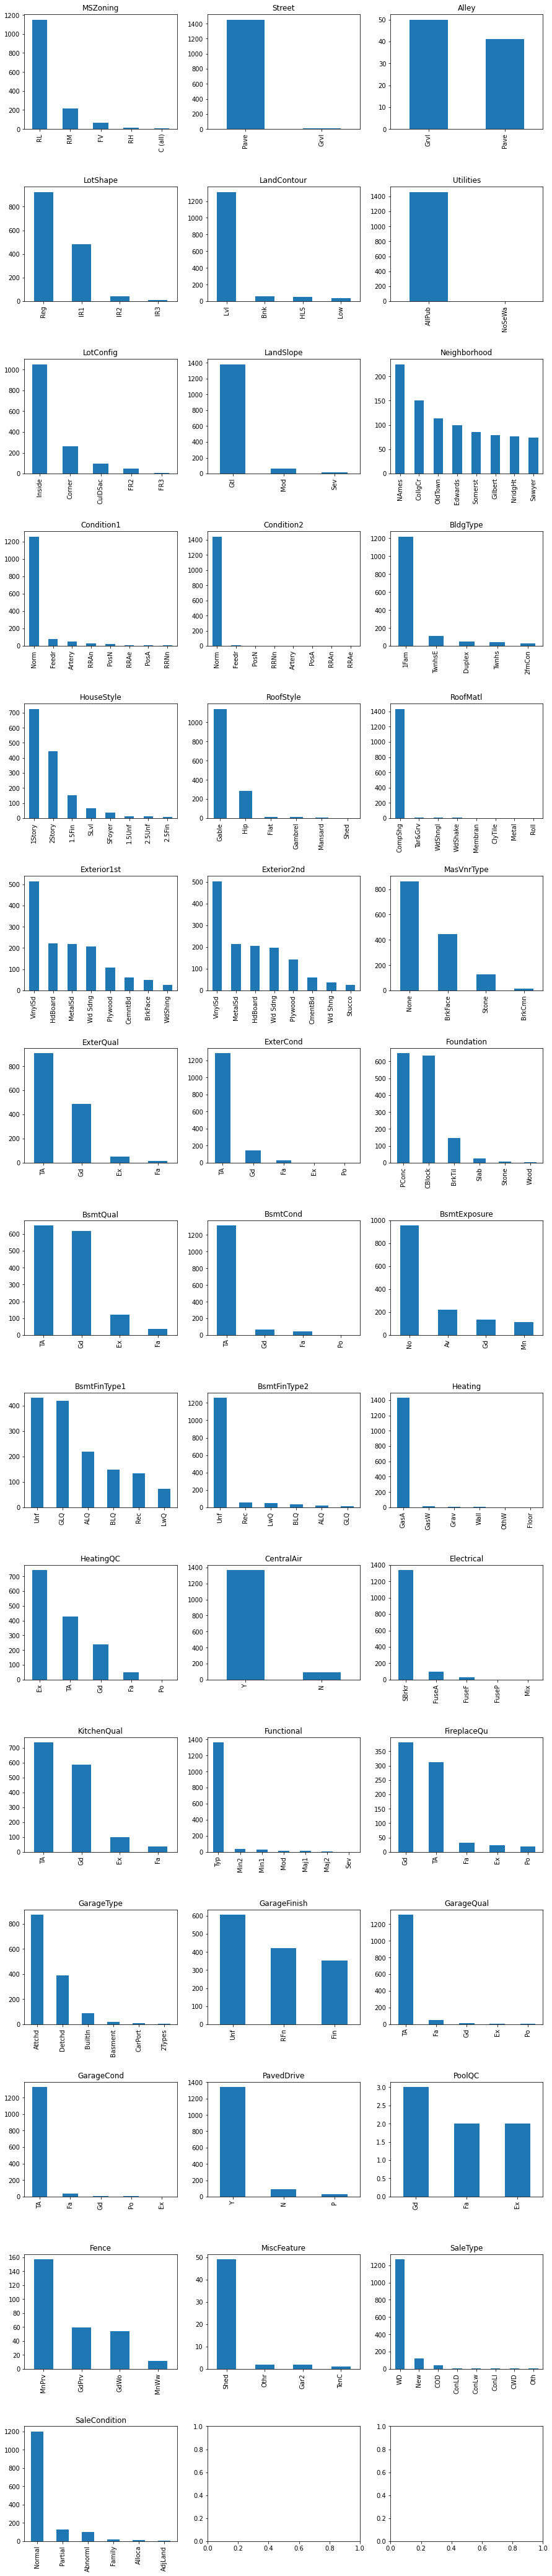

In [72]:
#we will create a histogram for each categorical attribute
n=len(categorical_columns)
cols = 3
rows=(n//3) + 1 if n%3 !=0 else 0
max_bars = 8

#generate a figures grid:
fig, axes = plt.subplots(rows,cols,figsize=(cols*5,rows*5))
fig.subplots_adjust(hspace=0.5)


for i,column in enumerate(categorical_columns):
    #calculate the current place on the grid
    r=int(i/cols)
    c=i%cols
    
    #create the "value counts" for the first <max_bars> categories:
    u=min(dtf[column].nunique(),max_bars)
    vc = dtf[column].value_counts()[:u]
    
    # plot a bar chart using Pandas
    vc.plot(kind='bar',ax=axes[r,c],title=column)


## Chi-Squared Test for Feature Selection

Lets run chi squared test for some categorical variables

In [133]:
dtf.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [106]:
stats.chisquare(dtf.SaleCondition.value_counts())

Power_divergenceResult(statistic=4546.534246575341, pvalue=0.0)

In [103]:
stats.chisquare(dtf.PoolQC.value_counts())

Power_divergenceResult(statistic=0.2857142857142857, pvalue=0.8668778997501817)

Now lets test the significance of a categorical feature on the target feature

In [160]:
high_price_threshod = dtf.SalePrice.mean() + dtf.SalePrice.std()
high_price_threshod

260363.69877329757

In [161]:
sale_price_binary = dtf.SalePrice.apply(lambda x: 'high' if x>high_price_threshod else 'low')

We now create the contingency table

<AxesSubplot:>

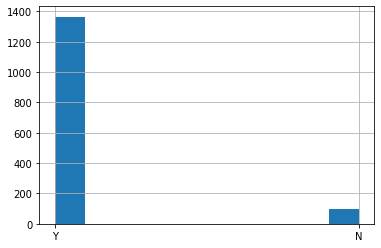

In [162]:
dtf.CentralAir.hist()

In [163]:
contingency_table = pd.crosstab(dtf.CentralAir,sale_price_binary)
contingency_table

SalePrice,high,low
CentralAir,,
N,1,94
Y,190,1175


In [164]:
c, p, dof, expected = stats.chi2_contingency(contingency_table)

In [165]:
c,p

(11.82483874083654, 0.0005844577601780587)

### Plotting Numeric Columns

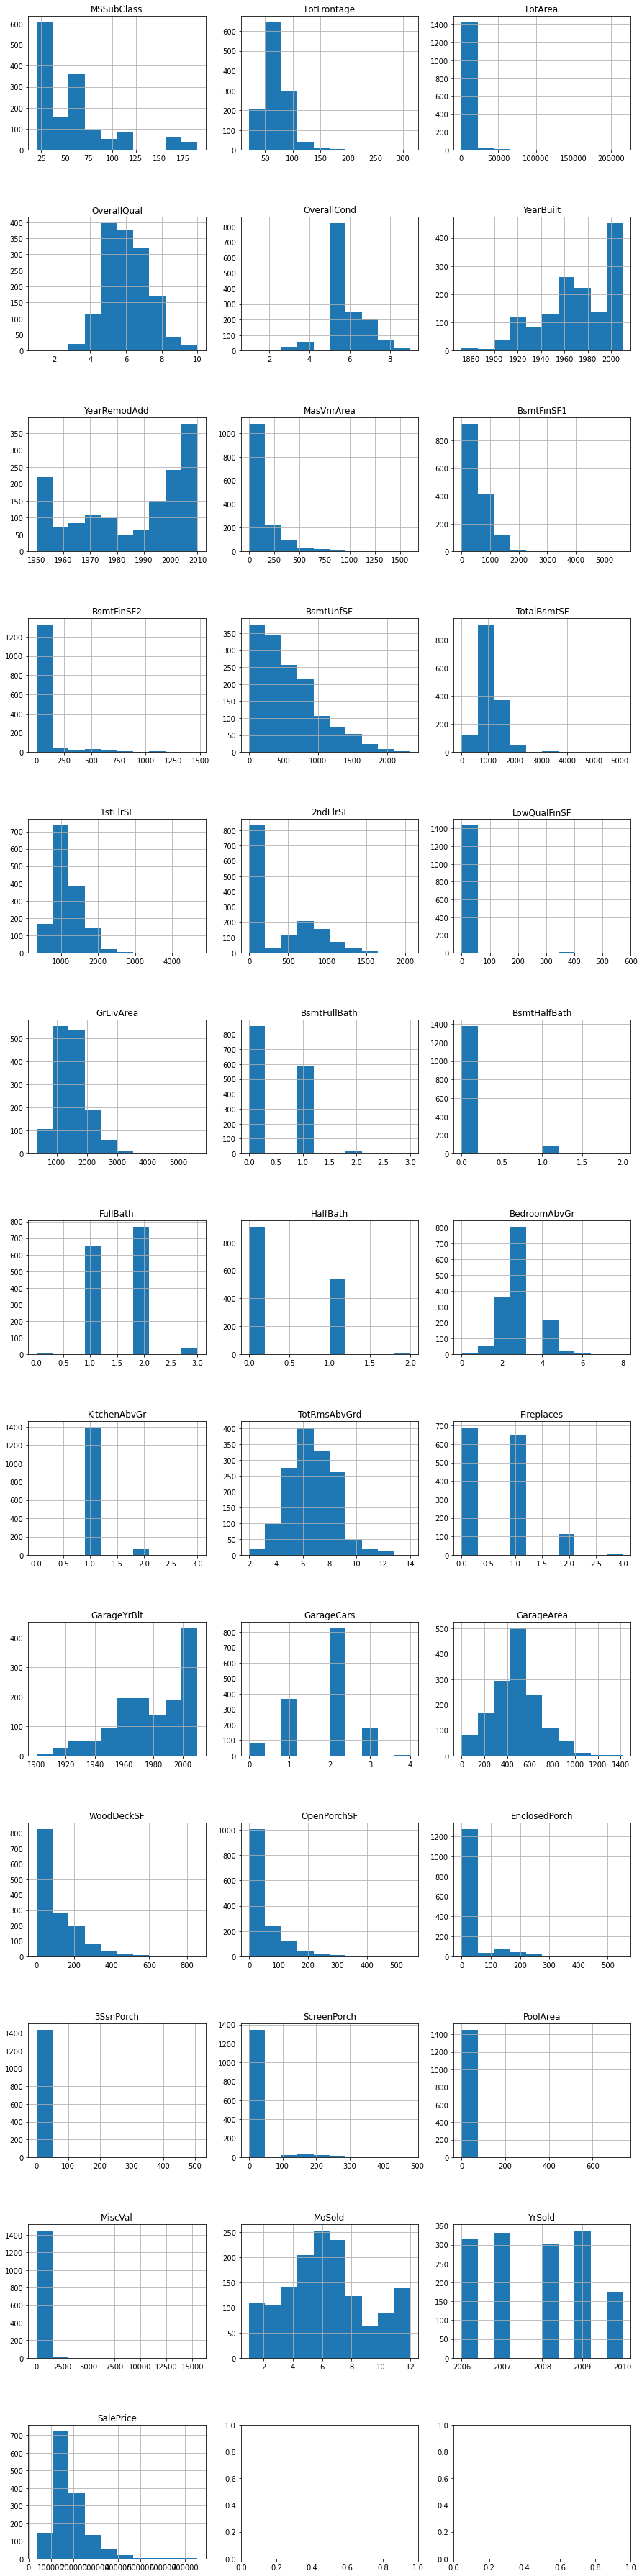

In [166]:

#we will create a histogram for each categorical attribute
n=len(numeric_columns)
cols = 3
rows=(n//3) + 1 if n%3 !=0 else 0
#max_bars = 8


#generate a figures grid:
fig, axes = plt.subplots(rows,cols,figsize=(cols*5,rows*5))
fig.subplots_adjust(hspace=0.5)



for i, column in enumerate(numeric_columns):
    #calculate the current place on the grid
    r=int(i/cols)
    c=i%cols
    
    # build the histograms
    dtf[column].hist(ax=axes[r,c])
    axes[r,c].set_title(column)



    

## Q-Q Plots

In [167]:
#dist: <scipy.stats._continuous_distns.norm_gen>
#fit : bool

A Q-Q plot with no specifications:

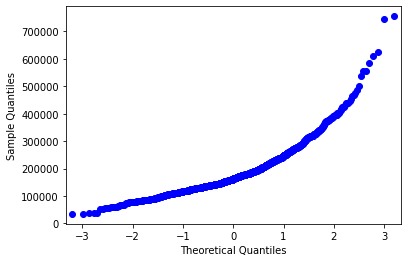

In [168]:
p=sm.qqplot(dtf.SalePrice)

The above graph compares the empirical distribution of `SalePrice` with the standard normal distribution

In [169]:
qnorm = stats.norm.ppf

Lets play with the Q function for the normal distribution:

In [170]:
qnorm(0.30)

-0.5244005127080409

We now draw the line between the theoretical and empirical quantiles

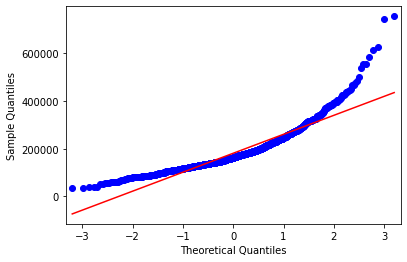

In [171]:
p=sm.qqplot(dtf.SalePrice,line='s')

Types of lines:
- "45" - 45-degree line
- "s" - standardized line, the expected order statistics are scaled
  by the standard deviation of the given sample and have the mean
  added to them
 -  "r" - A regression line is fit
 -  "q" - A line is fit through the quartiles (often 1st and third).

It may be not so intuitive that the theoretical quantiles and the empirical ones are from different value domains <br>
We can use `fit=True`


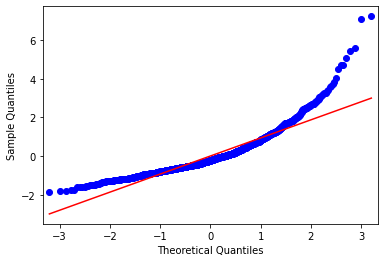

In [172]:
p=sm.qqplot(dtf.SalePrice,fit=True,line='r')

Now both quantiles are from the same domain: The empirical values are standrad-scaled (i.e. $x \rightarrow \frac{x-\mu}{\sigma}$) <br>
If we want to see the q-q plot in terms of the empirical quantiles, we need to give it parameters:

In [173]:
m=dtf.SalePrice.mean()
s=dtf.SalePrice.std()
m,s

(180921.19589041095, 79442.50288288662)

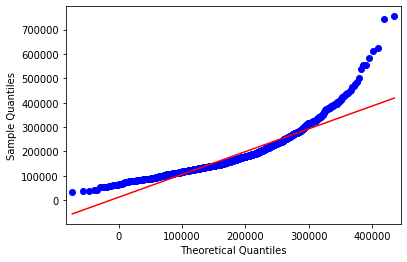

In [174]:
p=sm.qqplot(dtf.SalePrice,loc=m,scale=s,line='r')

But we can also fit the distribution parameters using Maximum Likelihood Estimation:

In [176]:
m2,s2= stats._continuous_distns.norm.fit(dtf.SalePrice)
m2,s2

(180921.19589041095, 79415.29188606751)

Now lets try to fit to other distributions:

In [177]:
#stats._continuous_distns.uniform

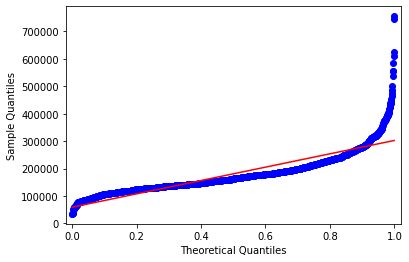

In [178]:
p=sm.qqplot(dtf.SalePrice,fit=False,dist=stats._continuous_distns.uniform,line='r')

If we only take the "good" prices:

In [179]:
good_prices=dtf.SalePrice[(dtf.SalePrice>100000) & (dtf.SalePrice<250000)]

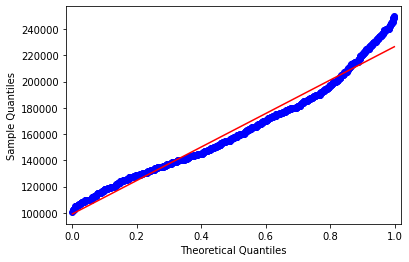

In [180]:
p=sm.qqplot(good_prices,fit=False,dist=stats._continuous_distns.uniform,line='r')

In [181]:
## A small scale simple example:

In [182]:
#p=sm.qqplot(np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]),fit=False,line="45",dist=stats._continuous_distns.uniform)

In [183]:
#p=sm.qqplot(np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]),fit=True,line="45")

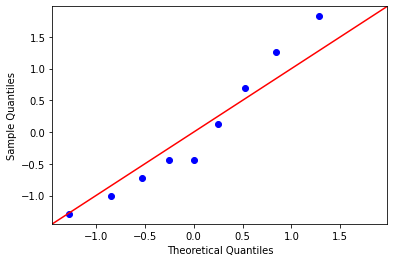

In [184]:
p=sm.qqplot(np.array([0.35,0.4,0.45,0.5,0.5,0.6,0.7,0.8,0.9]),fit=True,line="45")

We can now do this on a larger scale:

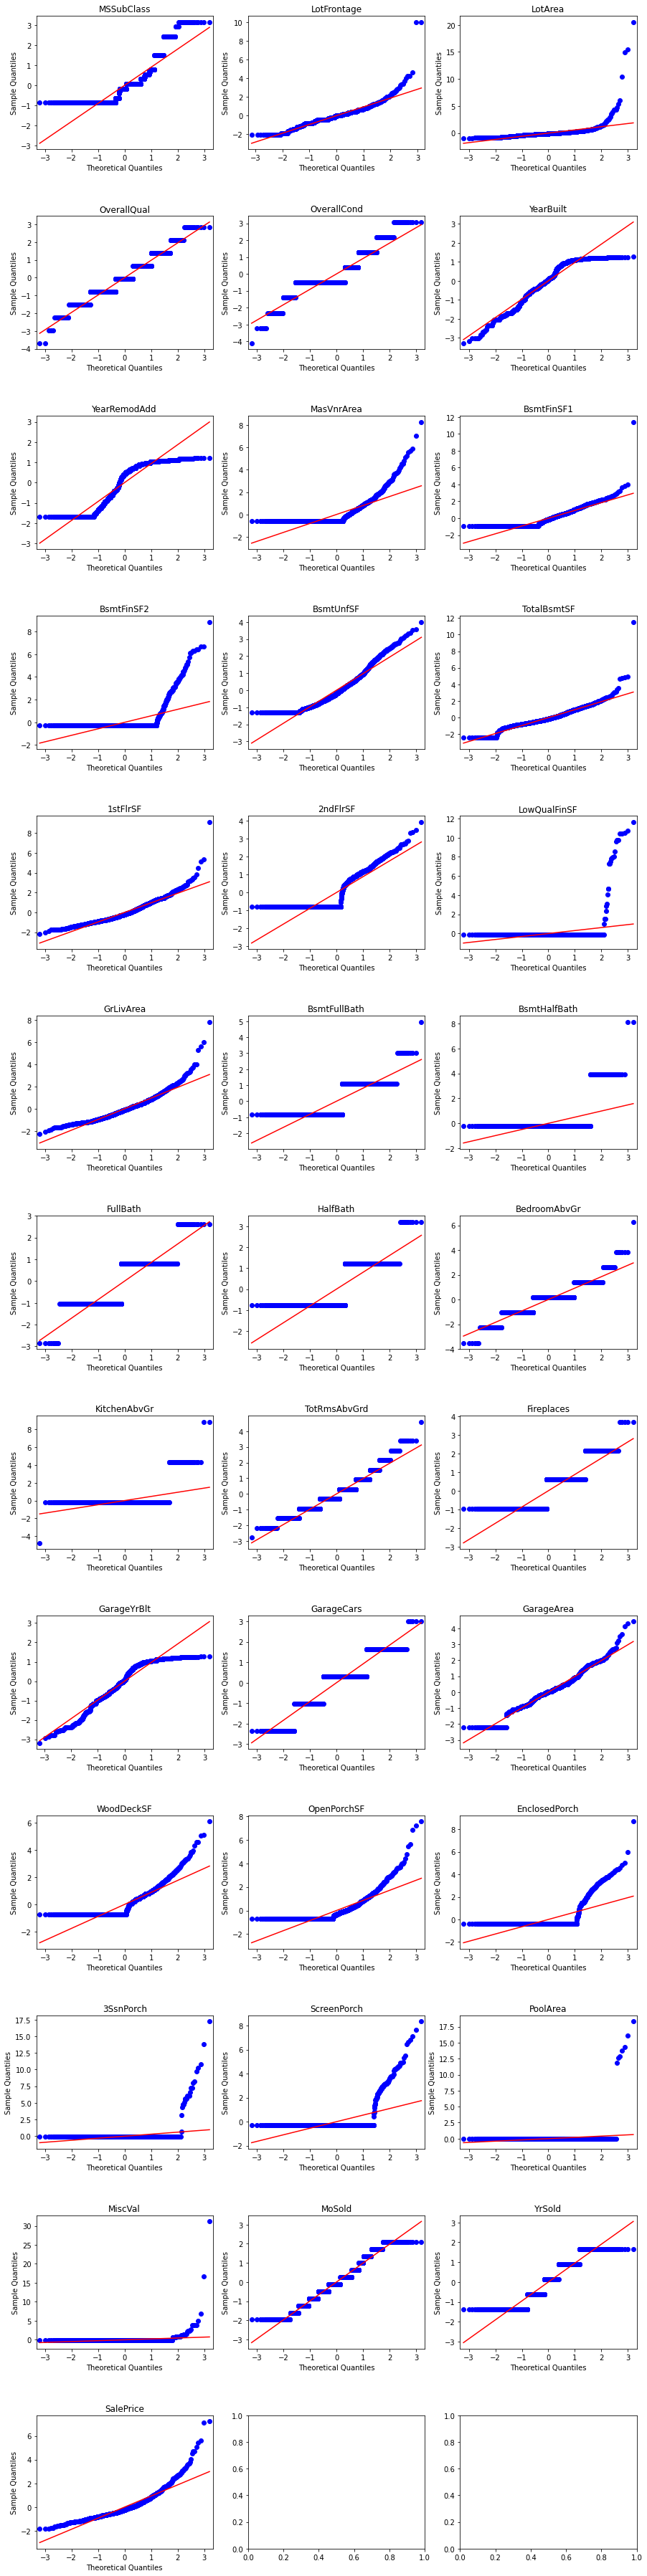

In [185]:

#we will create a histogram for each categorical attribute
n=len(numeric_columns)
cols = 3
rows=(n//3) + 1 if n%3 !=0 else 0
#max_bars = 8


#generate a figures grid:
fig, axes = plt.subplots(rows,cols,figsize=(cols*5,rows*5))
fig.subplots_adjust(hspace=0.5)



for i, column in enumerate(numeric_columns):
    #calculate the current place on the grid
    r=int(i/cols)
    c=i%cols
    
    # build the qqplots
    #dtf[column].hist(ax=axes[r,c])
    sm.qqplot(dtf[column].dropna(),fit=True,line='r',ax=axes[r,c])
    axes[r,c].set_title(column)




## Project Ideas??

 - We have ~90 theoretical distributions... 
 - Some elements in the empirical distribution do not go well with the theoretical ones.

## KS Test

In [186]:
ks = stats.ks_1samp

In [198]:
ks(dtf.SalePrice.values,stats._continuous_distns.norm.cdf,args=(m,s))

KstestResult(statistic=0.12368542719946385, pvalue=6.330230702928437e-20)

In [190]:
ks(dtf.SalePrice.values,stats._continuous_distns.uniform.cdf,args=(m2,s2))

KstestResult(statistic=0.6202405727401654, pvalue=0.0)